<a name = "inicio"></a>

1. [Introducción](#Introducción)
1. [Base teórica](#Base-teórica)
    1. [Carga y transformación de datos](#Carga-y-transformación-de-datos)
    1. [Tipos de datos temporales en pandas](#Tipos-de-datos-temporales-en-pandas)
    1. [Herramientas de pandas](#Herramientas-de-pandas)
        1. [Remuestreado](#Remuestreado)
        1. [Interpolado](#Interpolado)
        1. [Truncado](#Truncado)
        1. [Desplazamientos](#Desplazamientos)
        1. [Diferencias](#Diferencias)
    1. [Conceptos matemáticos](#Conceptos-matemáticos)
        1. [Correlación](#Correlación)
        1. [Autocorrelación](#Autocorrelación)
        1. [La función de autocorrelación (ACF)](#La-función-de-autocorrelación-(ACF))
        1. [La función de autocorrelación parcial (PACF)](#La-función-de-autocorrelación-parcial-(PACF))
        1. [Ruido blanco](#Ruido-blanco)
1. [Modelos ARIMA](#Modelos-ARIMA)
    1. [El modelo Autorregresivo (AR)](#El-modelo-Autorregresivo-(AR))
        1. [AIC y BIC](#AIC-y-BIC)
        1. [Predicción](#Predicción)
    1. [El modelo Moving Average (MA)](#El-modelo-Moving-Average-(MA))
    1. [El modelo ARMA](#El-modelo-ARMA)
    1. [Series estacionarias (stationary series)](#Series-estacionarias-(stationary-series))
        1. [El test de Dicky-Fuller Aumentado](#El-test-de-Dicky-Fuller-Aumentado)
        1. [Transformaciones](#Transformaciones)
        1. [Integración](#Integración)
    1. [Perfiles de los datos AR y MA](#Perfiles-de-los-datos-AR-y-MA)
        1. [Datos AR](#Datos-AR)
        1. [Datos MA](#Datos-MA)
    1. [El modelo ARIMA](#El-modelo-ARIMA)
    1. [Búsqueda en bucle del mejor modelo](#Búsqueda-en-bucle-del-mejor-modelo)
    1. [Descomposición de una serie estacional](#Descomposición-de-una-serie-estacional)
    1. [El modelo SARIMA](#El-modelo-SARIMA)
    1. [Diagnóstico del modelo](#Diagnóstico-del-modelo)
    1. [Automatización del cálculo de los órdenes óptimos](#Automatización-del-cálculo-de-los-órdenes-óptimos)
    1. [El modelo ARIMAX](#El-modelo-ARIMAX)

# Introducción
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

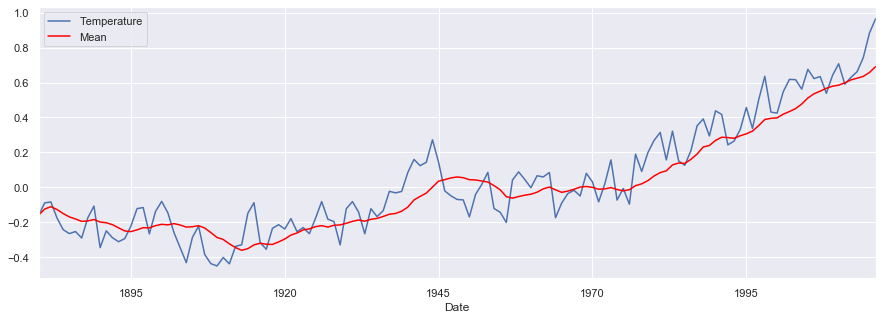

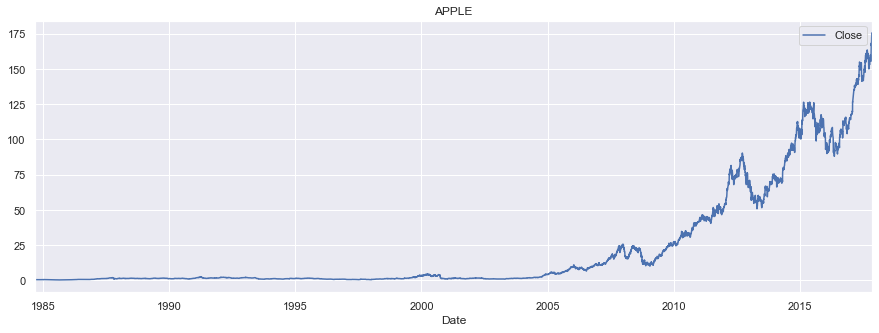

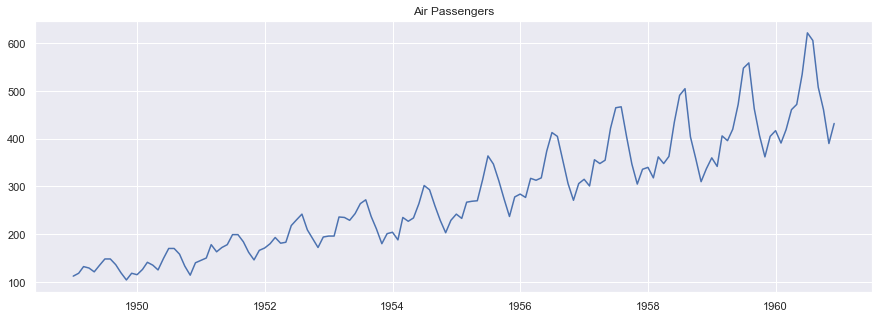

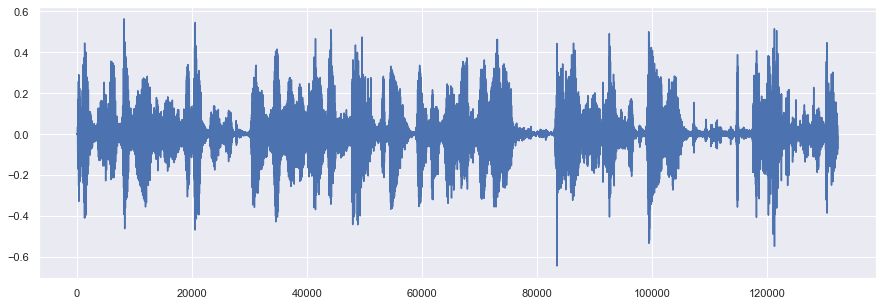

# Base teórica
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use("seaborn")

## Carga y transformación de datos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Comencemos cargando un conjunto de datos con información temporal: el dataset <i>candy</i> con información sobre la producción de caramelos en los Estados Unidos.

In [12]:
# parse_dates convierte los datos de texto a tipo de Datetime
candy = pd.read_csv("./datasets/candy_production.csv", parse_dates = ["observation_date"])
# cambiar nombres de índices o columnas
candy.rename({"observation_date": "date", "IPG3113N": "production"}, axis = 1, inplace = True) 
# hacemos que date sea el índice
candy.set_index("date", inplace = True)
candy.head()

,production
date,
1972-01-01,85.6945
1972-02-01,71.8200
1972-03-01,66.0229
1972-04-01,64.5645
1972-05-01,65.0100


/home/angelrps/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


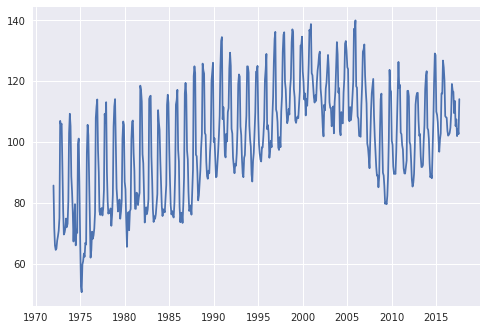

In [13]:
plt.plot(candy)
plt.show()

In [ ]:
# el dataset representa producción total de caramelos por meses
# Cada fila representa los caramelos fabricados en un período de un mes
# nosotros trabajaremos con períodos usando pandas

In [14]:
candy = candy.to_period("M")

In [16]:
candy.info() # ahora tenemos "periodindex"

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 548 entries, 1972-01 to 2017-08
Freq: M
Data columns (total 1 columns):
production    548 non-null float64
dtypes: float64(1)
memory usage: 8.6 KB


In [17]:
candy.head()

,production
date,
1972-01,85.6945
1972-02,71.8200
1972-03,66.0229
1972-04,64.5645
1972-05,65.0100


In [18]:
plt.plot(candy) # esto ahora nos da error porque no reconoce periodos temporales. USAREMOS PANDAS

TypeError: Axis must have `freq` set to convert to Periods

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f8141b8e0e0> (for post_execute):


ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 576x396 with 1 Axes>

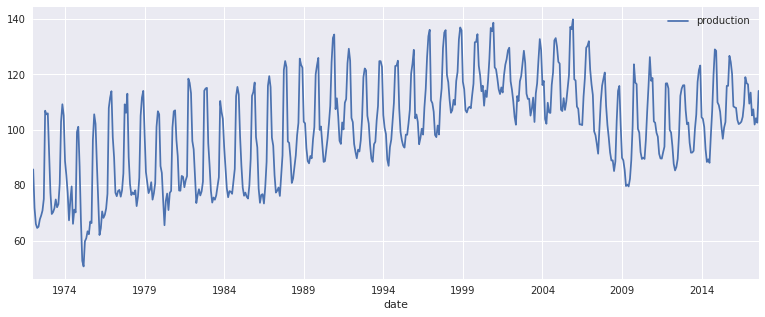

In [22]:
# esto es usando plot de pandas
fig, ax = plt.subplots(figsize = (13, 5))
candy.plot(ax = ax) 

como voy a hacer muchas graficas no quiero tener que definir el tamaño de los plot cada vez fig, ax = plt.subplots(figsize = (13, 5)). Así que defino el size así para siempre:
plt.rcParams["figure.figsize"] = (13,5)

In [23]:
plt.rcParams["figure.figsize"] = (13,5)

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Carga y muestra en pantalla los datos relativos al valor bursátil de IBM (dataset "ibm.txt"). Quédate apenas con el campo "Close" (además del campo que contiene la fecha, por supuesto).</div>
</div>

In [33]:
ibm = pd.read_csv("./datasets/ibm.txt", parse_dates = ["Date"], usecols=["Date", "Close"], index_col = "Date")
# el argumento index_col hace lo mismo que set_index
# ibm.set_index("Date", inplace = True)
ibm.head()

,Close
Date,
1962-01-02,6.3378
1962-01-03,6.3963
1962-01-04,6.3295
1962-01-05,6.2041
1962-01-08,6.0870


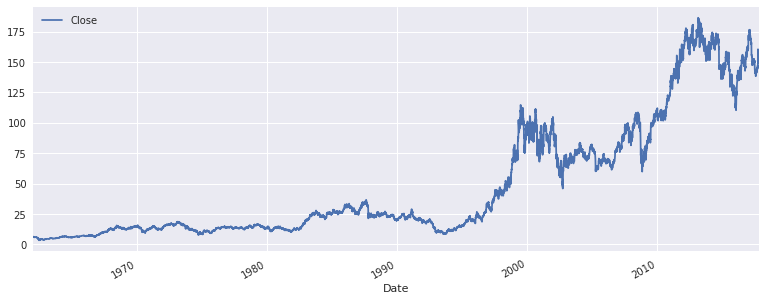

In [34]:
ibm.plot();

## Tipos de datos temporales en pandas
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

#### La clase Timestamp

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

utilizaremos la librería temporal de pandas en lugar de la libreía "datetime" de python porque los modelos ARIMA trabajan con pandas

In [36]:
# timestamp es un instance en el tiempo. Le metemos un string y nos genera un time stamp
pd.Timestamp("1/2/2019")
# me ha interpretado meas día año, en lugar de dia, mes, año

Timestamp('2019-01-02 00:00:00')

In [39]:
# mejor darle año mes y día por separado
pd.Timestamp(2019, 2, 1)

Timestamp('2019-02-01 00:00:00')

In [40]:
pd.Timestamp(2019, 2, 1, 16, 17, 22)

Timestamp('2019-02-01 16:17:22')

In [41]:
pd.Timestamp(year = 2019, month = 10, day = 28, hour = 16, minute = 56, second = 12,
                 microsecond = 13, nanosecond = 16)

Timestamp('2019-10-28 16:56:12.000013016')

In [42]:
from datetime import date

In [44]:
# también puedo crear un timestamp de pandas a partir de un objeto date creado con la libreía datetime standar de python
pd.Timestamp(date(2019, 8, 26))

Timestamp('2019-08-26 00:00:00')

In [45]:
d = pd.Timestamp(year = 2019, month = 10, day = 28, hour = 16, minute = 56, second = 12,
                 microsecond = 13, nanosecond = 16)
d

Timestamp('2019-10-28 16:56:12.000013016')

In [46]:
print(d.year)
print(d.month)
print(d.day)
print(d.hour)
print(d.minute)
print(d.second)
print(d.microsecond)
print(d.nanosecond)

2019
10
28
16
56
12
13
16


In [47]:
print(d.quarter)
print(d.week)
print(d.dayofweek)
print(d.dayofyear)
print(d.day_name())
print(d.month_name())

4
44
0
301
Monday
October


#### La clase Period

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Period.html

Period genera un periodo (no un instante)

In [50]:
p = pd.Period("2017-01")
p
# deduce qie es un período mensual

Period('2017-01', 'M')

In [52]:
pd.Period("2020")
# deduce que es un periodo anual, ojo que acaba de Diciembre. Se podría indicar que acabara en otro mes

Period('2020', 'A-DEC')

In [54]:
p.start_time # donde comienza el periodo

Timestamp('2017-01-01 00:00:00')

In [ ]:
p.end_time # donde termina el periodo

In [57]:
p.asfreq("D") # convierto un periodo de un mes a un día
# por defecto lo asocia a primer día de mes

Period('2017-01-31', 'D')

In [58]:
p = pd.Period("2017-05-23")
p.asfreq("M")

Period('2017-05', 'M')

In [60]:
p = p.asfreq("M")
p
# si cambio la frecuencia de un periodo día a un mes pierdo la información del día

Period('2017-05', 'M')

In [61]:
p.asfreq("D")

Period('2017-05-31', 'D')

In [62]:
# como convertir un periodo en un tiemstamp
pd.Period("2018-05").to_timestamp()

Timestamp('2018-05-01 00:00:00')

In [63]:
# puedo sumar 2 días a un periodo
p = pd.Period("2017-05-23")
p + 2

Period('2017-05-25', 'D')

In [64]:
# o sumar y restar periodos
p = pd.Period("2017-05-23")
q = pd.Period("2017-05-28")
q - p

<5 * Days>

#### La clase Timedelta

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timedelta.html

Un timedelta es un periodo de tiempo que no está asignado a un start o end
Por ejemplo un time delta es "5 días". Cúando empiezan los 5 días? no lo sé

In [66]:
d = pd.Timedelta(weeks = 1, days = 2, hours = 3, minutes = 4, seconds = 5, milliseconds = 6,
                 microseconds = 7, nanoseconds = 8)
d

Timedelta('9 days 03:04:05.006007')

In [67]:
print(d.days)
print(d.seconds)
print(d.microseconds)
print(d.nanoseconds)

9
11045
6007
8


Puedo crear timedelta con un texto!!!!!!!!!

In [76]:
pd.Timedelta("1 day 1 second")

Timedelta('1 days 00:00:01')

In [77]:
pd.Timedelta("1 day 1 millisecond")

Timedelta('1 days 00:00:00.001000')

In [78]:
pd.Timedelta("1 hour")

Timedelta('0 days 01:00:00')

In [79]:
pd.Timedelta("2 hour")

Timedelta('0 days 02:00:00')

In [80]:
pd.Timedelta("2 hours")

Timedelta('0 days 02:00:00')

In [81]:
pd.Timedelta("2.3 hours")

Timedelta('0 days 02:18:00')

In [82]:
# puedo sumar timestamp con delta y me devuelve timestamp!!
pd.Timestamp(2019, 8, 25, 18, 49) + pd.Timedelta("3 hours")

Timestamp('2019-08-25 21:49:00')

#### La clase date_range

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html

Nos permite generar índices.
Un índice es un listado de fecha o de periodos
Tenemos 4 posibles parámetros: start, end, periods, freq. Pero solo puedo darle 3 de los 4.

In [84]:
pd.date_range("August, 28 2018", periods = 5, freq = "M")

DatetimeIndex(['2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30',
               '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [85]:
pd.date_range("August, 28 2018", periods = 5, freq = "D")

DatetimeIndex(['2018-08-28', '2018-08-29', '2018-08-30', '2018-08-31',
               '2018-09-01'],
              dtype='datetime64[ns]', freq='D')

In [86]:
# puedo darle el start con la función date de la libreria datetime
# este codigo coge las semanas enteras que cojan esos dos días
pd.date_range(start = date(2019, 8, 13), end = date(2019, 9, 21), freq = "W")

DatetimeIndex(['2019-08-18', '2019-08-25', '2019-09-01', '2019-09-08',
               '2019-09-15'],
              dtype='datetime64[ns]', freq='W-SUN')

In [87]:
# MS es monthstart
pd.date_range(start = "2018-01-1", end = "2019-12-31", freq = "MS")

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [89]:
from datetime import datetime

In [90]:
pd.date_range(start = datetime.today(), periods = 5, freq = "H")

DatetimeIndex(['2020-02-28 18:12:24.479006', '2020-02-28 19:12:24.479006',
               '2020-02-28 20:12:24.479006', '2020-02-28 21:12:24.479006',
               '2020-02-28 22:12:24.479006'],
              dtype='datetime64[ns]', freq='H')

In [91]:
# esto divide el periodo en 4 partes iguales
pd.date_range(start = "2019-1-1", end = "2019-3-1", periods = 4)

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-20 16:00:00',
               '2019-02-09 08:00:00', '2019-03-01 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
# dame los "B" business day en este periodo
pd.date_range(start = "2019-8-1", end = "2019-8-31", freq = "B")

In [ ]:
# 
pd.date_range(start = "2019-8-1", end = "2019-8-31", freq = "B") + pd.Timedelta("3 hours")

<div style="background:#0099cc;padding:20px;color:#ffffff">
    <strong>EJERCICIO</strong>
Crea un dataframe df con 12 fechas consecutivas (interpretadas como puntos en el tiempo) a partir del 1 de enero de 2019 en el índice y una columna "Value" con valores aleatorios:
</div>

In [92]:
index = pd.date_range(start = "1-1-2019", periods = 12, freq = "D")
index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12'],
              dtype='datetime64[ns]', freq='D')

In [94]:
df = pd.DataFrame({"Value": np.random.randint(0,10, 12)}, index = index)
df

,Value
2019-01-01,0
2019-01-02,9
2019-01-03,6
2019-01-04,5
2019-01-05,9
2019-01-06,6
2019-01-07,6
2019-01-08,6
2019-01-09,7
2019-01-10,7


<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
Crea un dataframe df con 6 horas consecutivas (interpretadas como períodos) a partir de las 6 de la tarde del 11 de marzo de 2019 en el índice y una columna "Value" con valores aleatorios:
</div>

#### La clase period_range

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.period_range.html

Igual que antes pero ahora generamos periodos en lugar de instantes en el tiempo

In [95]:
p = pd.period_range(start = "2019-1-1T15:0:0", periods = 12, freq = "H")
p

PeriodIndex(['2019-01-01 15:00', '2019-01-01 16:00', '2019-01-01 17:00',
             '2019-01-01 18:00', '2019-01-01 19:00', '2019-01-01 20:00',
             '2019-01-01 21:00', '2019-01-01 22:00', '2019-01-01 23:00',
             '2019-01-02 00:00', '2019-01-02 01:00', '2019-01-02 02:00'],
            dtype='period[H]', freq='H')

## Herramientas de pandas
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

### Remuestreado
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

Leamos el dataset *global_temperature_monthly.csv*. ¿Las muestras están distribuidas tal y como necesitamos?

In [99]:
global_temp = pd.read_csv("./datasets/global_temperature_monthly.csv", parse_dates = ["Date"],
                          index_col="Date")
global_temp.head()

,Source,Mean
Date,,
2016-12-06,GCAG,0.7895
2016-12-06,GISTEMP,0.8100
2016-11-06,GCAG,0.7504
2016-11-06,GISTEMP,0.9300
2016-10-06,GCAG,0.7292


In [100]:
global_temp.Source.unique()

array(['GCAG', 'GISTEMP'], dtype=object)

In [102]:
# vemos que hay dos fuentes de datos, dos medidas de temperatura cada día
# para tener una fila por día utilizo "resample" de pandas para hacer virguerías con las fechas

In [104]:
# agrupo por mes y aplico una función de agregación, por ejemplo la media
global_temp_month = global_temp.resample("M").mean()
global_temp_month.head()

,Mean
Date,
1880-01-31,-0.14955
1880-02-29,-0.16645
1880-03-31,-0.15785
1880-04-30,-0.15995
1880-05-31,-0.10690


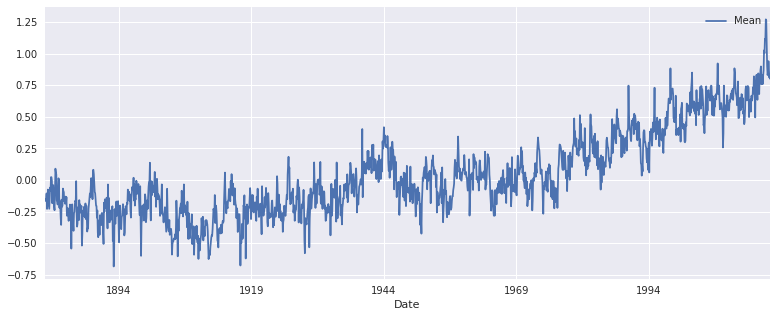

In [106]:
global_temp_month.plot();

Hacemos lo mismo pero anualmente

In [107]:
global_temp_annual = global_temp.resample("A").mean()
global_temp_annual.head()

,Mean
Date,
1880-12-31,-0.159467
1881-12-31,-0.089329
1882-12-31,-0.083667
1883-12-31,-0.176208
1884-12-31,-0.242550


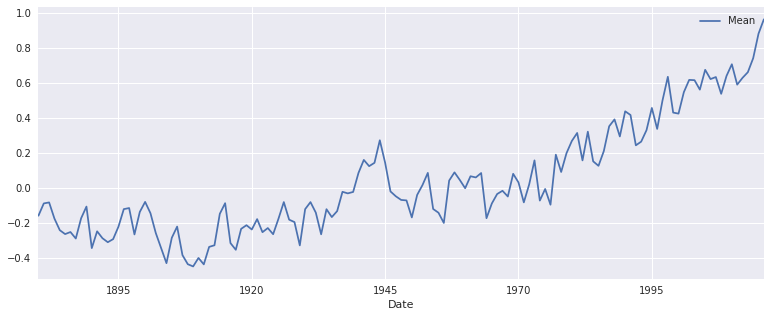

In [108]:
global_temp_annual.plot();

Esto es especialmente útil si las fechas no son periódicas, como ocurre en el dataset months.csv:

In [110]:
data = pd.read_csv("./datasets/months.csv", parse_dates = ["date"], index_col = "date")
data

,value
date,
2019-01-04,8
2019-01-16,4
2019-03-02,9
2019-03-03,3
2019-03-11,4
2019-04-02,7
2019-06-06,3
2019-06-26,5
2019-07-18,1


In [112]:
data.resample("M").sum()

,value
date,
2019-01-31,12
2019-02-28,0
2019-03-31,16
2019-04-30,7
2019-05-31,0
2019-06-30,8
2019-07-31,7


In [113]:
data.resample("M").mean()

,value
date,
2019-01-31,6.000000
2019-02-28,NaN
2019-03-31,5.333333
2019-04-30,7.000000
2019-05-31,NaN
2019-06-30,4.000000
2019-07-31,3.500000


### Interpolado
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

Una herramienta muy útil es la que nos permite sustituir valores nulos por el resultado de interpolar los valores existentes, lo que puede ocurrir si aplicamos a un dataframe una frecuencia: df = df.asfreq("D"). Veámoslo en el dataset de days.csv

OJO!! solo sustituye valores NULOS, si simplemente no hay valores no hace nada

In [128]:
days = pd.read_csv("./datasets/days.csv", parse_dates = ["date"], index_col="date")
days

,value
date,
2019-01-01,8
2019-01-02,4
2019-01-04,9
2019-01-05,3
2019-01-08,4
2019-01-09,7


In [129]:
# con esto me mete NaN donde no hay valores
days =days.asfreq("D")
days

,value
date,
2019-01-01,8.0
2019-01-02,4.0
2019-01-03,NaN
2019-01-04,9.0
2019-01-05,3.0
2019-01-06,NaN
2019-01-07,NaN
2019-01-08,4.0
2019-01-09,7.0


In [131]:
days.interpolate()

,value
date,
2019-01-01,8.000000
2019-01-02,4.000000
2019-01-03,6.500000
2019-01-04,9.000000
2019-01-05,3.000000
2019-01-06,3.333333
2019-01-07,3.666667
2019-01-08,4.000000
2019-01-09,7.000000


In [132]:
# cuando hay dos NaN seguidos solo sustituyo 1
days.interpolate(limit = 1)

,value
date,
2019-01-01,8.000000
2019-01-02,4.000000
2019-01-03,6.500000
2019-01-04,9.000000
2019-01-05,3.000000
2019-01-06,3.333333
2019-01-07,NaN
2019-01-08,4.000000
2019-01-09,7.000000


### Truncado
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

permite eliminar indices superiores o inferiores a uno dado
OJO, EL DATA FRAME O LA SERIE DEBE ESTAR ORDENADO

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.truncate.html

Otro útil método es .truncate(), que nos permite eliminar los índices anteriores y/o posteriores a uno dado.

**IMPORTANTE**: El índice deberá estar ordenado.

In [133]:
s = pd.Series(np.random.randint(0, 10, 10))
s

0    3
1    4
2    8
3    5
4    5
5    6
6    3
7    5
8    6
9    7
dtype: int64

In [134]:
s.truncate(before = 6)

6    3
7    5
8    6
9    7
dtype: int64

In [135]:
s.truncate(after = 5)

0    3
1    4
2    8
3    5
4    5
5    6
dtype: int64

In [136]:
s.truncate(before = 4, after = 6)

4    5
5    6
6    3
dtype: int64

Podemos aplicarlo a candy... tanto con períodos mensuales como anuales.

In [137]:
candy.head()

,production
date,
1972-01,85.6945
1972-02,71.8200
1972-03,66.0229
1972-04,64.5645
1972-05,65.0100


In [138]:
# elimino todos los registros anteriores al año 2000
candy.truncate(before = "2000")

,production
date,
2000-01,123.1325
2000-02,119.7423
2000-03,113.9508
2000-04,115.9481
2000-05,108.7202
...,...
2017-04,107.4288
2017-05,101.9209
2017-06,104.2022


In [139]:
candy.truncate(before = "2000-05")

,production
date,
2000-05,108.7202
2000-06,114.2071
2000-07,111.8737
2000-08,117.9027
2000-09,125.6499
...,...
2017-04,107.4288
2017-05,101.9209
2017-06,104.2022


### Desplazamientos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

deja los indices fijos y desplaza los valores

El método .shift() aplicado a una serie o a un dataframe nos permite desplazarlo en una dirección (por defecto hacia abajo):

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html

In [140]:
s.shift(2)

0    NaN
1    NaN
2    3.0
3    4.0
4    8.0
5    5.0
6    5.0
7    6.0
8    3.0
9    5.0
dtype: float64

In [141]:
data = pd.DataFrame(np.random.randint(0, 10, 20).reshape(4, -1), columns = list("ABCDE"))
data

,A,B,C,D,E
0,2,7,7,3,8
1,0,0,6,0,2
2,6,9,7,7,1
3,7,1,7,8,1


In [142]:
# por defecto el shift se aplica al eje vertical
data.shift(1)

,A,B,C,D,E
0,NaN,NaN,NaN,NaN,NaN
1,2.0,7.0,7.0,3.0,8.0
2,0.0,0.0,6.0,0.0,2.0
3,6.0,9.0,7.0,7.0,1.0


In [143]:
# con axis = 1 se aplica en horizontal
data.shift(1, axis = 1)

,A,B,C,D,E
0,NaN,2.0,7.0,7.0,3.0
1,NaN,0.0,0.0,6.0,0.0
2,NaN,6.0,9.0,7.0,7.0
3,NaN,7.0,1.0,7.0,8.0


In [144]:
s.shift(1)

0    NaN
1    3.0
2    4.0
3    8.0
4    5.0
5    5.0
6    6.0
7    3.0
8    5.0
9    6.0
dtype: float64

In [145]:
s - s.shift(1)

0    NaN
1    1.0
2    4.0
3   -3.0
4    0.0
5    1.0
6   -3.0
7    2.0
8    1.0
9    1.0
dtype: float64

In [146]:
# con diff restamos a una serie la misma serie desplazada "n" periodos
s.diff(1)

0    NaN
1    1.0
2    4.0
3   -3.0
4    0.0
5    1.0
6   -3.0
7    2.0
8    1.0
9    1.0
dtype: float64

### Diferencias
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html

El método .diff() permite calcular la diferencia de las columnas o filas de un dataframe:

In [ ]:
data

In [ ]:
s = pd.Series([2, 5, 4, 7, 6, 1, 5, 3])
s

## Conceptos matemáticos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

### Correlación
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Hoy hablamos de correlación de PEARSON

Alta correlación (positiva):

In [148]:
r = pd.Series([3.4, 8.9, 6.8, 0.6, 4.6, 8.4, 7.8, 1.3, 5.0 , 0.7])
s = pd.Series([6.4, 9.8, 8.8, 4.8, 6.9, 9.4, 7.8, 3.7, 7.7, 6.0 ])

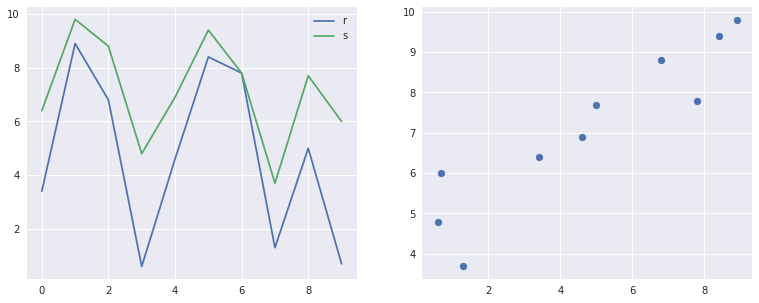

0.9215849991769304

In [152]:
fig, ax = plt.subplots(1,2)
ax[0].plot(r, label = "r")
ax[0].plot(s, label = "s")
ax[0].legend()

ax[1].scatter(r,s)

plt.show()
r.corr(s) # esto muestra la correlación de pearson

Alta correlación (negativa):

In [153]:
r = pd.Series([7.5, 8.8, 8.2, 4.5, 5.5, 6.4, 9.8, 6.2, 4.5, 8.7])
s = pd.Series([4.4, 5.6, 6.1, 9.9, 8.3, 8.3, 2.2, 8.4, 7.4, 4.3])

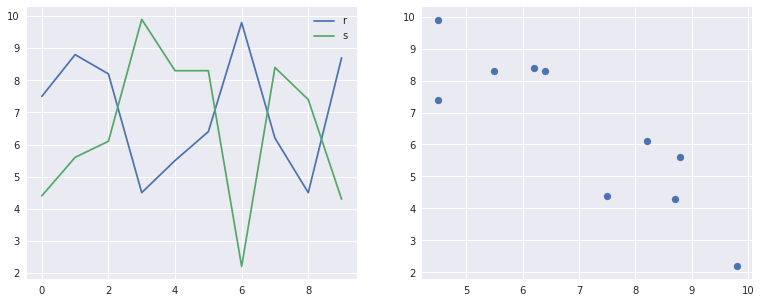

-0.8725229717753339

In [154]:
fig, ax = plt.subplots(1,2)
ax[0].plot(r, label = "r")
ax[0].plot(s, label = "s")
ax[0].legend()

ax[1].scatter(r,s)

plt.show()
r.corr(s) # esto muestra la correlación de pearson

Baja correlación:

In [155]:
r = pd.Series([8.4, 5.3, 3.2, 9. , 1.2, 4.1, 7.3, 7.2, 2.8, 3.7])
s = pd.Series([6.3, 9. , 4.3, 5.5, 6.8, 9.6, 4.4, 1.6, 5.6, 0.5])

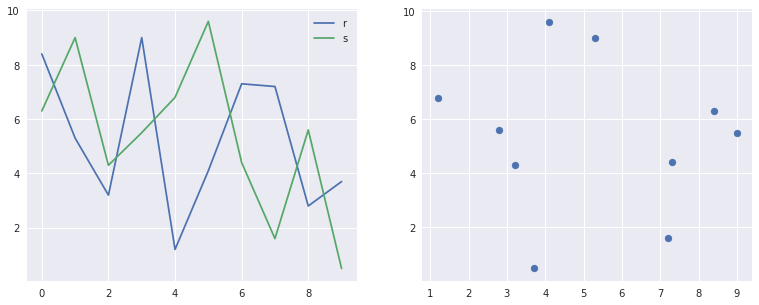

-0.10630510433176735

In [156]:
fig, ax = plt.subplots(1,2)
ax[0].plot(r, label = "r")
ax[0].plot(s, label = "s")
ax[0].legend()

ax[1].scatter(r,s)

plt.show()
r.corr(s) # esto muestra la correlación de pearson

http://tylervigen.com/view_correlation?id=1703

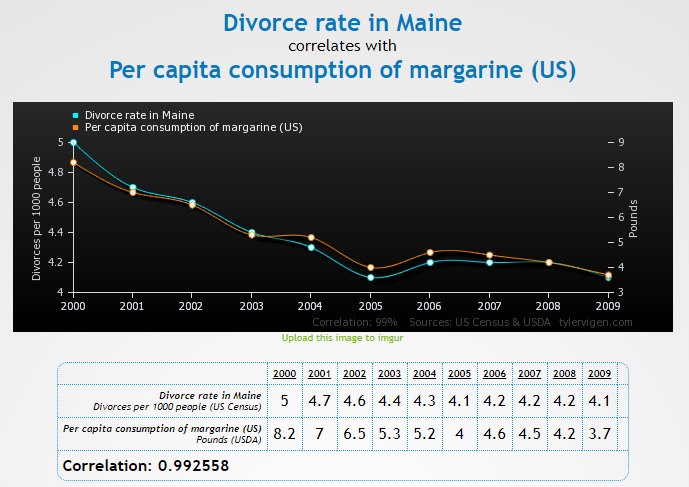

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Muestra en una gráfica la evolución de los valores bursátiles de IBM y Apple, y calcula la correlación entre ellos. Quédate solo con la columna "Close" (además de la que contiene la etiqueta temporal).</div>
</div>

### Autocorrelación
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

es la correlación de una serie con sigo misma tras haberla desplazado un numero de lags, periodos, puntos

In [158]:
s = pd.Series(np.random.randint(0, 5, (10, )))
s

0    1
1    0
2    0
3    1
4    4
5    1
6    3
7    3
8    2
9    4
dtype: int64

In [160]:
s.corr(s.shift(1))

0.22360679774997896

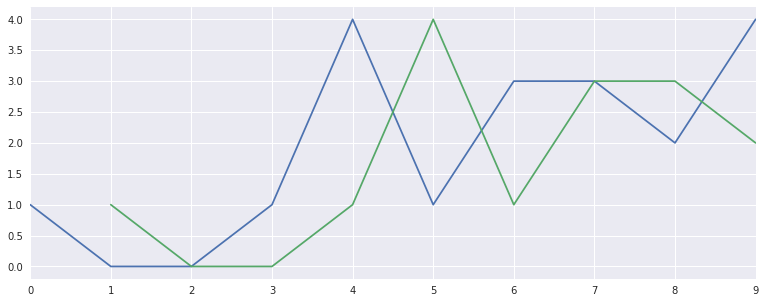

In [161]:
s.plot()
s.shift(1).plot()
plt.show()

¿Qué tipo de series mostrarán autocorrelación alta para algún lag?

In [ ]:
las funciones estacionales tienen en los periodos picos de correlación

In [163]:
# genero valores de una función senoidal
x = np.linspace(0, 12, 24)
y = np.sin(x)
y = pd.Series(y)

1.0


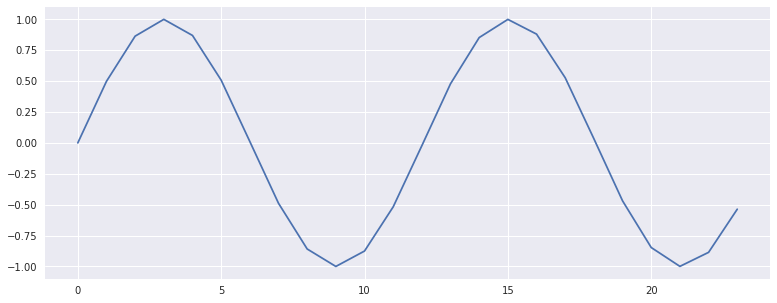

In [164]:
plt.plot(y);
print(y.corr(y))

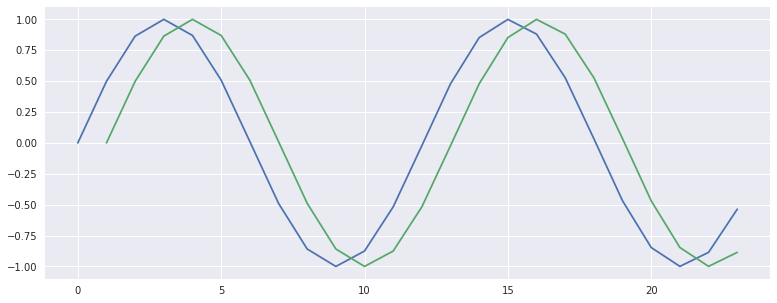

0.8769662829481312


In [166]:
plt.plot(y);
plt.plot(y.shift(1)) # desplazo y
plt.show()
print(y.corr(y.shift(1))) # imprimo la correlación entre y e y desplazado

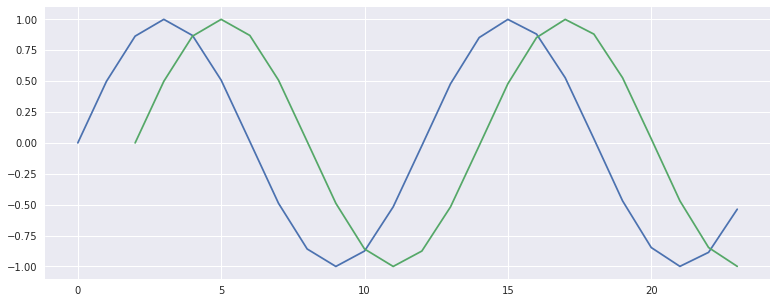

0.5582079972438304


In [167]:
plt.plot(y);
plt.plot(y.shift(2)) # desplazo y
plt.show()
print(y.corr(y.shift(2))) # imprimo la correlación entre y e y desplazado
# desplazando 2 en lugar de 1 la correlación es menor

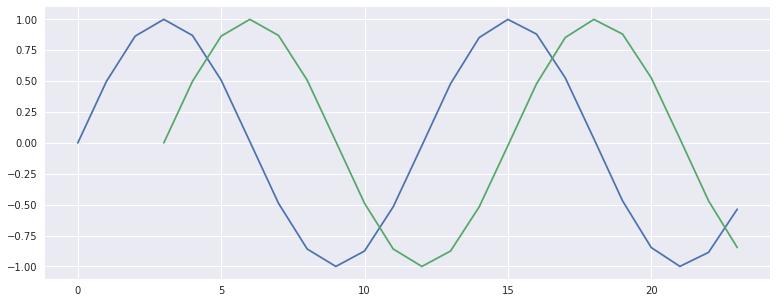

0.10295090073607362


In [169]:
plt.plot(y);
plt.plot(y.shift(3))
plt.show()
print(y.corr(y.shift(3)))

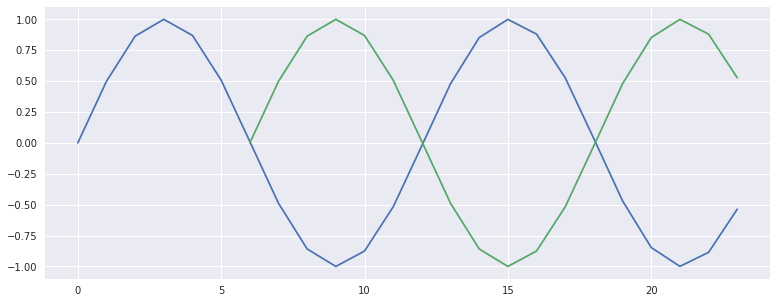

-0.999932907269958


In [171]:
plt.plot(y);
plt.plot(y.shift(6))
plt.show()
print(y.corr(y.shift(6)))

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Calcula la autocorrelación de la función senoidal y para los lags entre 0 y 19</div>
</div>

In [172]:
# esto es la función de autocorrelación pero hecha a mano
for lag in range (20):
    print(lag, y.corr(y.shift(lag)))

0 1.0
1 0.8769662829481312
2 0.5582079972438304
3 0.10295090073607362
4 -0.4156445200785021
5 -0.8400800103410611
6 -0.999932907269958
7 -0.8754213232665885
8 -0.5554622541938353
9 -0.10504434514224271
10 0.41287463084238285
11 0.8394041433021404
12 0.9997525833198959
13 0.8968791741912433
14 0.6497962146967481
15 0.32657217479330264
16 -0.09108626980054128
17 -0.631830220760804
18 -0.9982702377583391
19 -0.5889255730259966


### La función de autocorrelación (ACF)
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [ ]:
es la correlación para n lags de la serie que sea

In [173]:
from statsmodels.tsa.stattools import acf

Tanto en acf como en plot_acf deberemos usar el parámetro unbiased = True para evitar que influya el número limitado de muestras.

In [176]:
acf(y, unbiased = True)
# esto me calcula lo mismo que he calculado arriba con el loop

array([ 1.        ,  0.90356254,  0.56950828,  0.08577032, -0.4206237 ,
       -0.81702267, -0.99993975, -0.92199644, -0.60398943, -0.12901963,
        0.37962086,  0.79083506,  0.99975258,  0.9544279 ,  0.66826273,
        0.21507171, -0.29164254, -0.72945374, -0.99945468, -1.05167003,
       -0.89672287, -0.60081893, -0.26565356,  0.00107954])

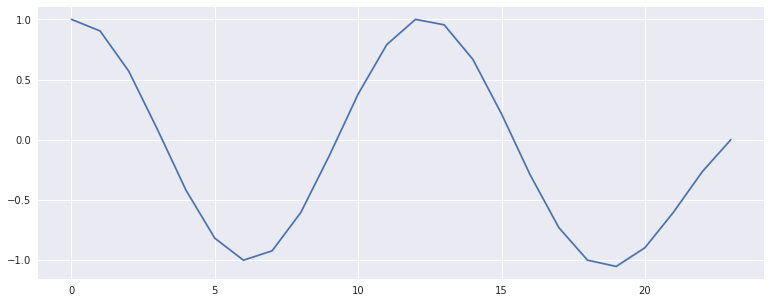

In [178]:
plt.plot(acf(y, unbiased = True));


In [179]:
from statsmodels.graphics.tsaplots import plot_acf

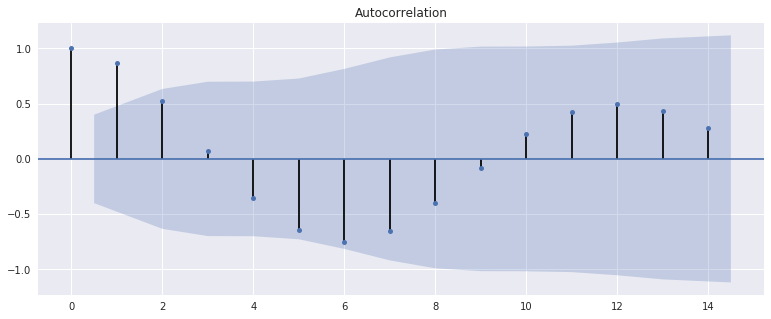

In [180]:
# esta función plot_acf me dibuja la funcion de autocorrelación y con un area 
# que representa el intervalo de confianza 95%
plot_acf(y);

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Muestra en pantalla la función de autocorrelación de candy para los 50 primeros lags. Interpreta el resultado</div>
</div>

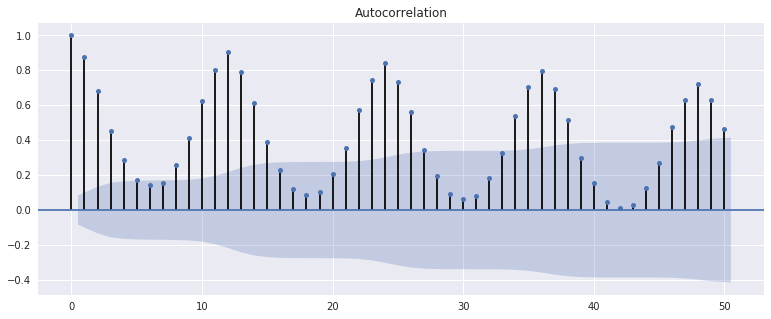

In [182]:
plot_acf(candy, lags=50);

### La función de autocorrelación parcial (PACF)
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

mediante una argucia matemática me elimita la influencia de los lags que ya han sido considerados

Para evitar errores, podemos vernos obligados a especificar el método de cálculo: method = "ywm"

In [186]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

In [188]:
pacf(candy)

array([ 1.00000000e+00,  8.75606579e-01, -3.47644452e-01, -2.40146453e-01,
        2.27571526e-01,  7.33969929e-03,  1.15796036e-01,  8.53614997e-02,
        3.44682661e-01,  2.92129400e-01,  4.93277421e-01,  3.42629591e-01,
        3.40953995e-01, -6.41358578e-01, -1.31078590e-01, -1.30445050e-01,
        7.43905927e-02,  8.98089192e-02,  9.07445795e-03,  7.83753025e-02,
        7.26744183e-02, -1.48921734e-05,  1.53684484e-01,  3.70602502e-02,
        1.01644795e-01, -2.89529578e-01, -8.20439564e-02, -3.15412977e-02,
        1.44899169e-01,  4.13381768e-02,  1.03366842e-01,  1.01552049e-01,
       -3.05579101e-02, -8.26961628e-03, -6.89532613e-02,  3.26702919e-03,
        2.69871626e-02, -1.23419972e-01, -1.36816404e-01, -9.38328668e-02,
        3.99590647e-02])

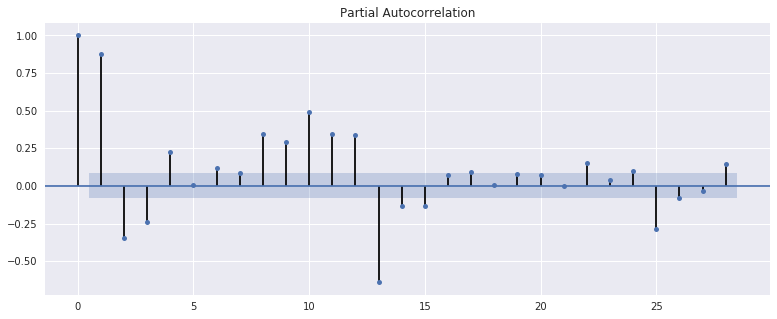

In [189]:
plot_pacf(candy);
# vemos que en la venta de caramelos solo influye realmente las ventas del mes anterior

### Ruido blanco
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

podemos generar ruido blanco con numpy

In [192]:
y = np.random.rand(1000)

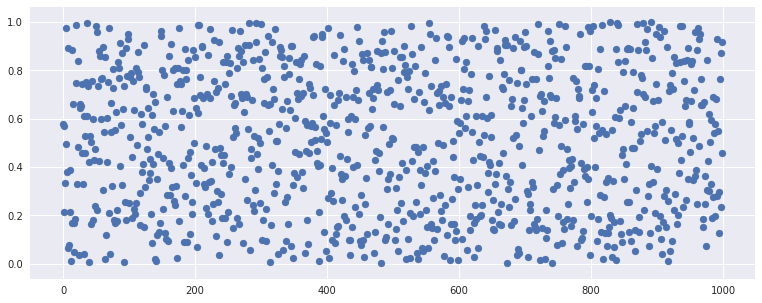

In [194]:
plt.scatter(range(1000), y)
# esto es ruido blanco

In [195]:
y = np.random.randn(1000)
# creamos otro ruido blanco pero extraidos de una concentración gausiana

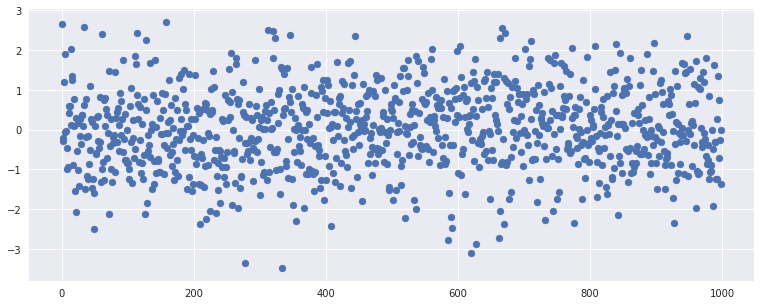

In [196]:
plt.scatter(range(1000), y)

# Modelos ARIMA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

## El modelo Autorregresivo (AR)
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

AR(1) es lo que se conoce como cadena de Markov

<strong>R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + a<sub>2</sub>.R<sub>t-2</sub> + ... + a<sub>p</sub>.R<sub>t-p</sub> + &epsilon;<sub>t</sub></strong>

p: orden del modelo

AR(1): R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + &epsilon;<sub>t</sub>

AR(2): R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + a<sub>2</sub>.R<sub>t-2</sub> + &epsilon;<sub>t</sub>

AR(p): R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + a<sub>2</sub>.R<sub>t-2</sub> + ... + a<sub>p</sub>.R<sub>t-p</sub> + &epsilon;<sub>t</sub>

Candy - AR(2):

In [197]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [198]:
model = SARIMAX(candy, order = (2, 0, 0)).fit()
# el 2 es el orden que he elegido
# AIC, BIC, HQIC penalizan los ordenes del modelo, cdan peor cuanto mayor es el ordem del modelo
# para no caer en overfitting
# cuanto menor es su valor mejor, hasta un mínimo de 0. Pero no hay nmáximo, no hay escala o rango, por lo que 
# sólo nos sirven para comparar modelos, saber si un modelo es mejor que otro.

In [199]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:             production   No. Observations:                  548
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1965.427
Date:                Fri, 28 Feb 2020   AIC                           3936.854
Time:                        20:12:28   BIC                           3949.773
Sample:                    01-31-1972   HQIC                          3941.904
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2575      0.056     22.553      0.000       1.148       1.367
ar.L2         -0.2624      0.057     -4.638      0.000      -0.373      -0.152
sigma2        75.6479      3.187     23.739      0.000      69.402      81.894
===================================================================================
Ljung-Box (Q):                     1697.19   Jarque-Bera (JB):               125.89
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### AIC y BIC
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Compara los valores de AIC y BIC para los modelos AR de orden 1 y 2 aplicados a candy.</div>
</div>

In [200]:
model.aic

3936.8543798817777

In [201]:
model.bic

3949.773205742622

In [202]:
model1 = SARIMAX(candy, order = (1, 0, 0)).fit()
model2 = SARIMAX(candy, order = (2, 0, 0)).fit()

In [203]:
print(model1.aic, model1.bic)
print(model2.aic, model2.bic)
# el modelo 2 es mejor porque sus valores son más bajos

3973.679772254489 3982.292322828385
3936.8543798817777 3949.773205742622


### Predicción
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [205]:
# hago la predicción para 24 meses siguientes al ultimo de la serie temporal
prediction = model.get_forecast(steps = 24)

In [208]:
prediction.predicted_mean

2017-09    116.518645
2017-10    116.597866
2017-11    116.052706
2017-12    115.346362
2018-01    114.601152
2018-02    113.849361
2018-03    113.099494
2018-04    112.353770
2018-05    111.612753
2018-06    110.876568
2018-07    110.145224
2018-08    109.418700
2018-09    108.696968
2018-10    107.979995
2018-11    107.267752
2018-12    106.560207
2019-01    105.857329
2019-02    105.159087
2019-03    104.465451
2019-04    103.776390
2019-05    103.091874
2019-06    102.411873
2019-07    101.736357
2019-08    101.065298
Freq: M, dtype: float64

In [211]:
prediction.conf_int()
# para cada valor predicho esto nos da el intervalo de confiacnza
# para la primera fila dice:
# con una confianza del 95% el valor se encuentra entre 99.47... y 133.56...

,lower production,upper production
2017-09,99.471696,133.565593
2017-10,89.208997,143.986735
2017-11,80.616458,151.488954
2017-12,73.289381,157.403342
2018-01,66.863888,162.338415
2018-02,61.093505,166.605218
2018-03,55.818245,170.380742
2018-04,50.932090,173.775450
2018-05,46.362009,176.863497
2018-06,42.055615,179.697521


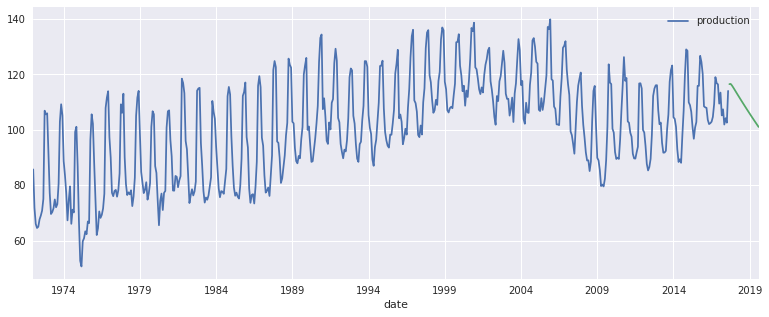

In [217]:
candy.plot()
prediction.predicted_mean.plot()
plt.show()

estamos dibujando la predicción del modelo AR(2)

In [221]:
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]

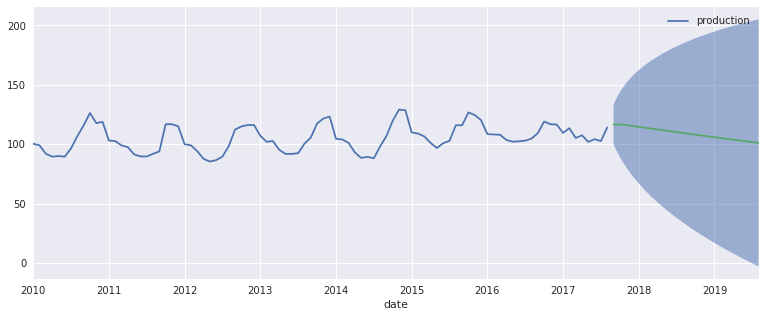

In [223]:
candy.truncate(before = "2010").plot()
prediction.predicted_mean.plot()
plt.fill_between(lower.index, lower, upper, alpha = 0.5)
plt.show()
# vemos una prediccion muy mala y un intervalo de confianza muy malo

Podemos acceder a los valores predichos para los datos en los que el modelo se ha entreado con el atributo .fittedvalues:

In [ ]:
model.fittedvalues

Es posible calcular el error cuadrático medio -por ejemplo-:

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(candy.production, model.fittedvalues)

## El modelo Moving Average (MA)
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

estima cada valor como una combinacion lineal de los epsilons (residuales) de los anterioras

<strong>R<sub>t</sub> = m<sub>1</sub>.&epsilon;<sub>t-1</sub> + m<sub>2</sub>.&epsilon;<sub>t-2</sub> + ... + m<sub>q</sub>.&epsilon;<sub>t-q</sub> + &epsilon;<sub>t</sub></strong>

p: orden del modelo:

MA(1): R<sub>t</sub> = m<sub>1</sub>.&epsilon;<sub>t-1</sub> + &epsilon;<sub>t</sub>

MA(2): R<sub>t</sub> = m<sub>1</sub>.&epsilon;<sub>t-1</sub> + m<sub>2</sub>.&epsilon;<sub>t-2</sub> + &epsilon;<sub>t</sub>

MA(q): R<sub>t</sub> = m<sub>1</sub>.&epsilon;<sub>t-1</sub> + m<sub>2</sub>.&epsilon;<sub>t-2</sub> + ... + m<sub>p</sub>.&epsilon;<sub>t-p</sub> + &epsilon;<sub>t</sub>

Candy - MA(3):

In [224]:
model = SARIMAX(candy, order = (0, 0, 3)).fit()

/home/angelrps/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [225]:
model.summary()
# 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:             production   No. Observations:                  548
Model:               SARIMAX(0, 0, 3)   Log Likelihood               -2719.637
Date:                Fri, 28 Feb 2020   AIC                           5447.274
Time:                        20:34:57   BIC                           5464.499
Sample:                    01-31-1972   HQIC                          5454.007
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.7975      0.070     25.708      0.000       1.660       1.935
ma.L2          1.2426      0.115     10.787      0.000       1.017       1.468
ma.L3          0.1481      0.069      2.141      0.032       0.013       0.284
sigma2      1173.1169     90.315     12.989      0.000     996.104    1350.130
===================================================================================
Ljung-Box (Q):                     3510.60   Jarque-Bera (JB):                 9.49
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               1.16   Skew:                             0.08
Prob(H) (two-sided):                  0.32   Kurtosis:                         2.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [227]:
# vamos a predecir 24 meses
prediction = model.get_forecast(steps = 24)
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]

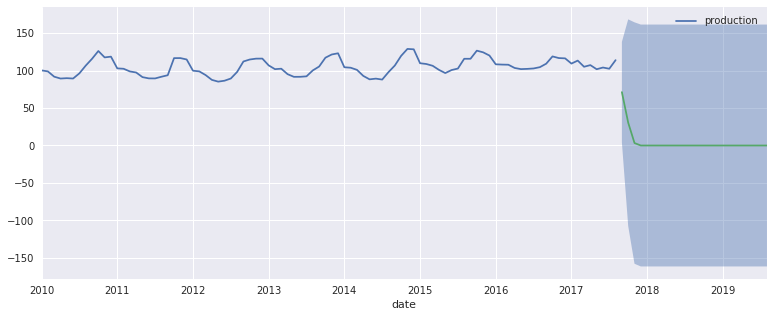

In [228]:
fig, ax = plt.subplots()
candy.truncate(before = "2010").plot(ax = ax)
prediction.predicted_mean.plot(ax = ax)
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

## El modelo ARMA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

es la combinación del model AR y MA

ARMA(1, 1): R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + m<sub>1</sub>.&epsilon;<sub>t-1</sub> + &epsilon;<sub>t</sub>

ARMA(p, q): AR(p): R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + a<sub>2</sub>.R<sub>t-2</sub> + a<sub>p</sub>.R<sub>t-p</sub> + R<sub>t</sub> = m<sub>1</sub>.&epsilon;<sub>t-1</sub> + m<sub>2</sub>.&

Candy - ARMA(2, 3):

ARMA(2, 3)
2 es el 

In [ ]:
#model = SARIMAX...

In [ ]:
prediction = model.get_forecast(steps = 12)
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]

In [ ]:
fig, ax = plt.subplots()
candy.truncate(before = "2010").plot(ax = ax)
prediction.predicted_mean.plot(ax = ax)
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

## Series estacionarias (stationary series)
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

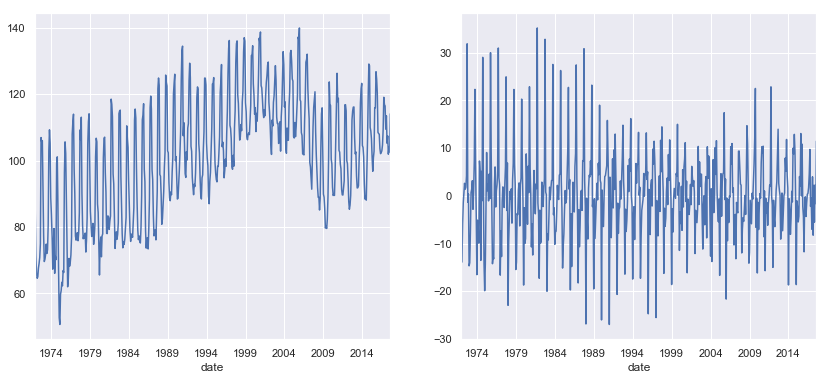

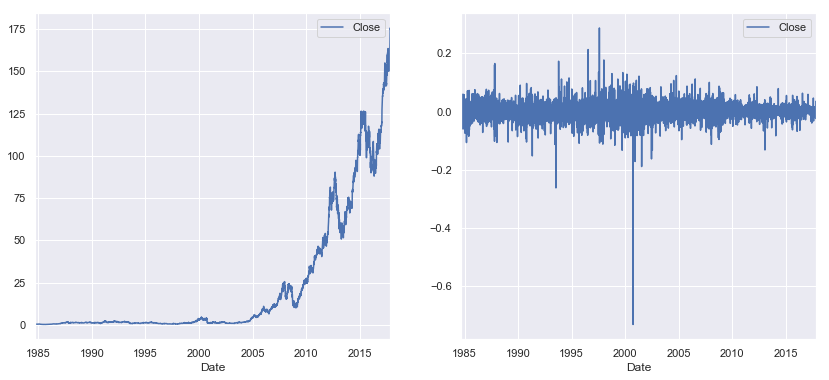

### El test de Dicky-Fuller Aumentado
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [230]:
from statsmodels.tsa.stattools import adfuller

In [232]:
adfuller(candy.production)
# el primer valor es el resultado del test
# el segudno es la probabilidad del p-value
# como da mayor que 0.05 significa que no podemos rechazar la hipotesis nula que es que los datos son estacionarios
# cosas que ya sabíamos porque candy no es estacionario

(-1.8870498112252763,
 0.3381775973004313,
 14,
 533,
 {'1%': -3.442678467240966,
  '5%': -2.8669778698997543,
  '10%': -2.5696661916864083},
 3012.789090974259)

In [237]:
candy_diff = candy.diff(1).dropna()

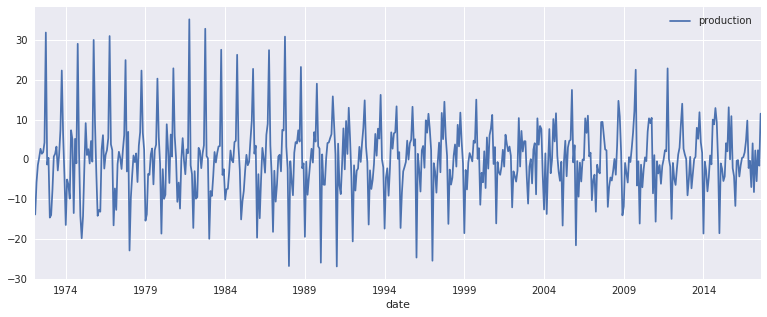

In [238]:
candy_diff.plot()

In [239]:
candy_diff.head()

,production
date,
1972-02,-13.8745
1972-03,-5.7971
1972-04,-1.4584
1972-05,0.4455
1972-06,2.6367


In [241]:
adfuller(candy_diff.production)
# el p-value sale casi 0

(-6.119511504715748,
 8.92558420357052e-08,
 13,
 533,
 {'1%': -3.442678467240966,
  '5%': -2.8669778698997543,
  '10%': -2.5696661916864083},
 3009.6697664167204)

vemos que usar una serie que es la diferencia entre la serie y su serie desplazada permite eliminar la tendencia

### Transformaciones
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

###### Diferencia

###### Porcentaje de cambio

Apliquémoslo al dataset AirPassengers.csv.

In [243]:
air = pd.read_csv("./datasets/AirPassengers.csv", parse_dates =["Month"])
air.rename({"Month": "date", "#Passengers": "passengers"}, axis = 1, inplace = True)
air.set_index("date", inplace = True)
air.head()

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


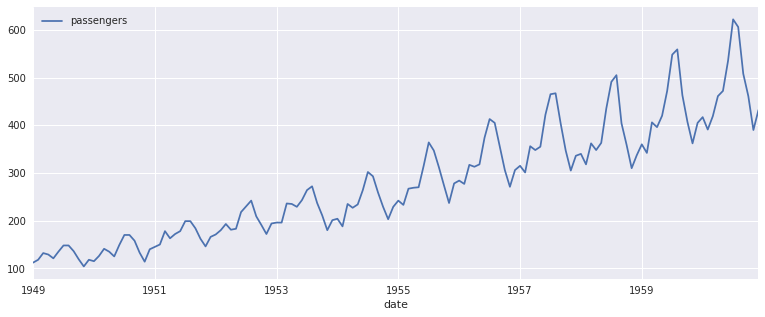

In [244]:
air.plot()

In [249]:
adfuller(air.passengers)

(0.8153688792060544,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [257]:
air_pct = air.pct_change().dropna() # porcentaje de cambio

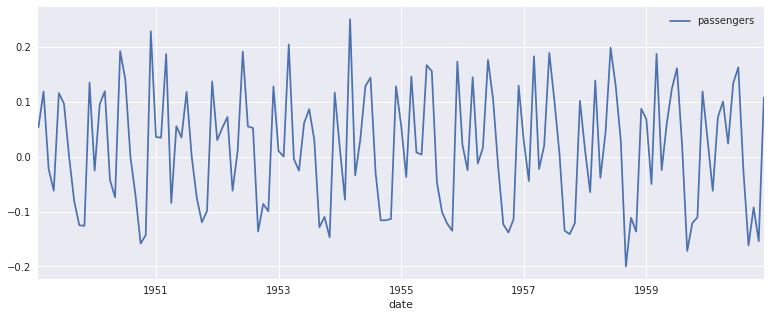

In [258]:
air_pct.plot(); # ha mejorado

In [259]:
adfuller(air_pct.passengers)

(-2.9261089075453897,
 0.04239503972523894,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -425.9255544019345)

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Carga el dataset AirPassengers.csv, aplica el método visto y pásale el test de Dicky-Fuller aumentado ¿es estacionario?</div>
</div>

###### Logaritmo

###### Otras funciones

###### Funciones combinadas

air_passengers + log + diff

### Integración
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

## Perfiles de los datos AR y MA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [ ]:
from statsmodels.tsa.arima_process import arma_generate_sample

### Datos AR
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Muestra la funciones de autocorrelación y de autocorrelación parcial para datos de un modelo AR(2)</div>
</div>

### Datos MA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Muestra la funciones de autocorrelación y de autocorrelación parcial para datos de un modelo MA(2)</div>
</div>

## El modelo ARIMA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Candy - ARIMA(3, 1, 2)

In [261]:
model = SARIMAX(candy, order = (3, 1, 2)).fit()
# AR orden 3, MA orden 2 y diferenciación 1

In [262]:
prediction = model.get_forecast(steps = 24)
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]

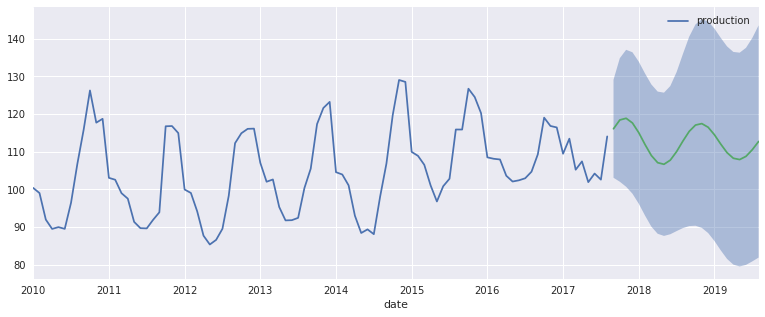

In [264]:
fig, ax = plt.subplots()
candy.truncate(before = "2010").plot(ax = ax)
prediction.predicted_mean.plot(ax = ax)
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Repite el ejercicio suponiendo que ambos días van a ser festivos</div>
</div>

## Búsqueda en bucle del mejor modelo
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [265]:
best_aic = 999999
for p in range(4):
    for q in range(4):
        for d in range(2):
            try:
                model = SARIMAX(candy, order = (p, d, q)).fit()
                if model.aic < best_aic:
                    best_aic = model.aic
                    print(p, d, q, model.aic, model.bic)
            except:
                pass

0 0 0 6628.977256015899 6633.283531302847
0 1 0 3960.6789418402914 3964.9833906427134
0 1 1 3934.649407427257 3943.258305032101


/home/angelrps/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0 1 2 3887.941443400523 3900.854789807789
0 1 3 3856.076777432051 3873.2945726417393


/home/angelrps/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1 1 3 3785.123649812007 3806.6458938241167


/home/angelrps/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 3 3638.4627899385214 3664.289482753053


/home/angelrps/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 1 3 3557.9603325632343 3588.091474180188


/home/angelrps/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


## Descomposición de una serie estacional
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

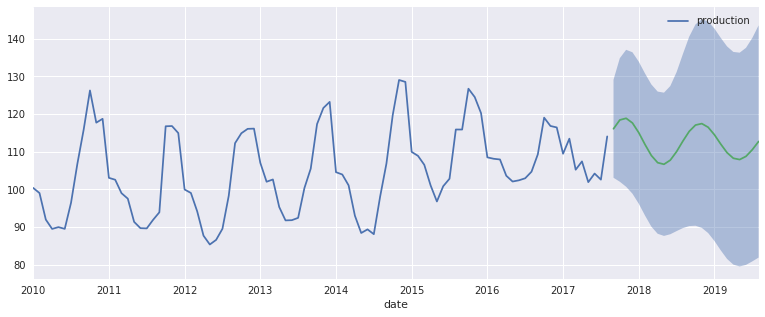

In [266]:
model = SARIMAX(candy, order = (3, 1, 2)).fit()
prediction = model.get_forecast(steps = 24)
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]
fig, ax = plt.subplots()
candy.truncate(before = "2010").plot(ax = ax)
prediction.predicted_mean.plot(ax = ax)
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

# la moraleja es que la combinación de los dos modelos es la que produce la gran mejora, no la diff

## El modelo SARIMA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ARIMA(2, 0, 1):&nbsp;&nbsp;&nbsp;y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + a<sub>2</sub>y<sub>t-2</sub> + m<sub>1</sub>&epsilon;<sub>t-1</sub> + &epsilon;<sub>t</sub>

SARIMA(0, 0, 0)(2, 0, 1)<sub>7</sub>:&nbsp;&nbsp;&nbsp;y<sub>t</sub> = a<sub>7</sub>y<sub>t-7</sub> + a<sub>14</sub>y<sub>t-14</sub> + m<sub>7</sub>&epsilon;<sub>t-7</sub> + &epsilon;<sub>t</sub>

model = SARIMAX(dataframe, order = (p, i, q), seasonal_order = (P, I, Q, S), trend = "c")

Convendrá convertir el índice del dataframe a timestamp para evitar problemas con la función plot_diagnostics...

Candy - SARIMA(3,1,2)(1, 1, 2, 12):

In [275]:
model = SARIMAX(candy.to_timestamp(), order=(3,1,2), seasonal_order=(1,1,2,12)).fit()
#to_timestamp() esto es solo para cambiar los indices para que más adelante la función plot_diagnostics() funcione

In [277]:
prediction = model.get_forecast(steps = 24)

In [278]:
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]

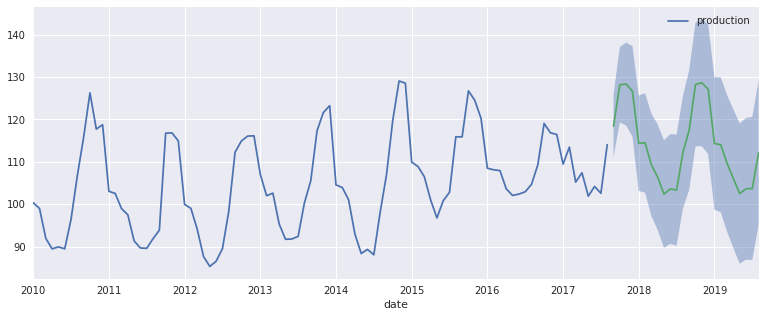

In [279]:
candy.truncate(before = "2010").plot()
prediction.predicted_mean.plot()
plt.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()
# sale una predicción bastante aceptable

## Diagnóstico del modelo
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [280]:
model.resid.head()
# resid nos devuelve los residuos (epsilon)

date
1972-01-01    85.694500
1972-02-01   -13.874292
1972-03-01    -5.797061
1972-04-01    -1.458528
1972-05-01     0.445557
Freq: MS, dtype: float64

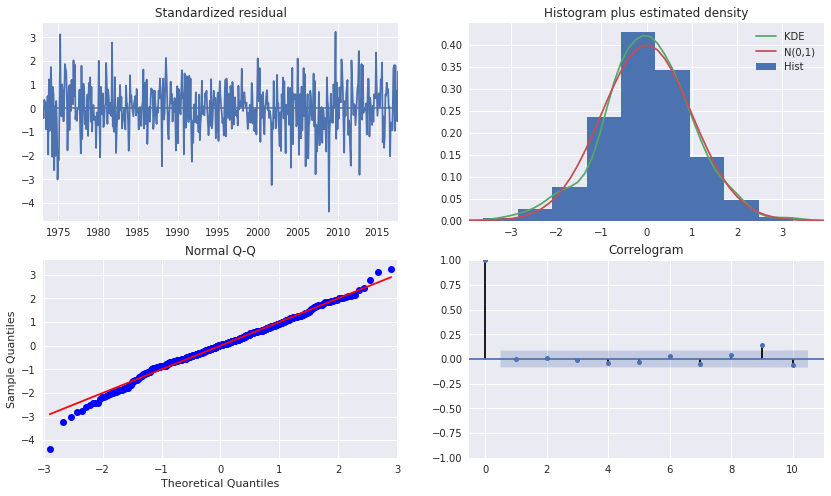

In [281]:
model.plot_diagnostics(figsize = (14, 8))
plt.show()
# estas 4 graficas nos permiten evaluar si los epsilon son o no son ruido blanco

In [282]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         production   No. Observations:                  548
Model:             SARIMAX(3, 1, 2)x(1, 1, 2, 12)   Log Likelihood               -1466.780
Date:                            Fri, 28 Feb 2020   AIC                           2951.561
Time:                                    21:33:54   BIC                           2990.101
Sample:                                01-01-1972   HQIC                          2966.640
                                     - 08-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2115      0.281      0.753      0.452      -0.339       0.762
ar.L2          0.3559      0.197      1.810      0.070      -0.030       0.741
ar.L3          0.1679      0.049      3.460      0.001       0.073       0.263
ma.L1         -0.5107      0.284     -1.801      0.072      -1.067       0.045
ma.L2         -0.4389      0.265     -1.654      0.098      -0.959       0.081
ar.S.L12      -0.0014      0.425     -0.003      0.997      -0.834       0.831
ma.S.L12      -0.6382      0.421     -1.515      0.130      -1.464       0.187
ma.S.L24      -0.1083      0.302     -0.359      0.720      -0.700       0.483
sigma2        13.8134      0.710     19.467      0.000      12.423      15.204
===================================================================================
Ljung-Box (Q):                       80.35   Jarque-Bera (JB):                26.52
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                            -0.25
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Automatización del cálculo de los órdenes óptimos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [289]:
import pmdarima as pm

ModuleNotFoundError: No module named 'pmdarima'

http://alkaline-ml.com/pmdarima/1.0.0/modules/generated/pmdarima.arima.auto_arima.html

auto_arima:  esta funcion me calcula los argumentos optimos para el SARIMAX

In [ ]:
model = pm.auto_arima(
    candy,
    m = 12,
    suppress_warnings=True
)

In [ ]:
model.summary()

In [ ]:
fig = model.plot_diagnostics()
fig.set_size_inches(15, 9)
plt.show()

In [ ]:
forecast_mean, conf_int = model.predict(24, return_conf_int = True)

In [ ]:
forecast_lower = conf_int[:, 0]
forecast_upper = conf_int[:, 1]

In [ ]:
dates = pd.period_range(start = candy.index[-1], periods = 25, freq = "M")[1:]
dates

In [ ]:
forecast = pd.Series(forecast_mean, index = dates)

In [ ]:
fig, ax = plt.subplots()
candy.truncate(before = "2010").plot(ax = ax)
forecast.plot(ax = ax, color = "red")
plt.fill_between(dates, forecast_lower, forecast_upper, color = "lightblue", alpha = 0.6)
plt.show()

## El modelo ARIMAX
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

ARMA(1,1): y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + m<sub>1</sub>&epsilon;<sub>t-1</sub> + &epsilon;<sub>t</sub>

ARMAX(1,1): y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + m<sub>1</sub>&epsilon;<sub>t-1</sub> + &epsilon;<sub>t</sub> + x<sub>1</sub>z<sub>t</sub>

In [291]:
ventas = pd.Series([10, 22, 15, 10, 25, 30, 18, 12, 21, 18, 11, 24, 28, 24])

In [286]:
festivos = pd.Series([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1])

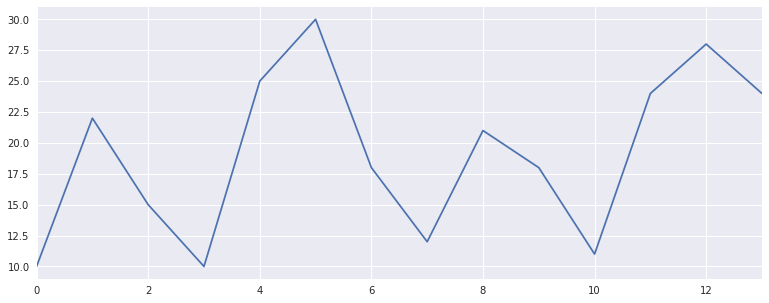

In [292]:
ventas.plot()

In [293]:
model= SARIMAX(ventas, order = (2,1, 2), seasonal_order = (1,0,1,7), exog = festivos).fit()

ValueError: maxlag should be < nobs

In [287]:
lower = prediction.conf_int()["lower y"]
upper = prediction.conf_int()["upper y"]

KeyError: 'lower y'

In [288]:
fig, ax = plt.subplots()
ventas.plot(ax = ax)
prediction.predicted_mean.plot(ax = ax, label = "Forecast")
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f8141b8e0e0> (for post_execute):


ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 936x360 with 1 Axes>